In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mob = pd.read_csv('mobile.csv')
mob.head(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


In [3]:
mob.shape

(2000, 21)

In [4]:

mob['price_range'].unique()


array([1, 2, 3, 0])

In [5]:
mob.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
mob['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [7]:
print(mob.groupby('price_range')['four_g'].mean())
print('=============================================')
print(mob.groupby('price_range')['three_g'].mean())

price_range
0    0.518
1    0.524
2    0.494
3    0.550
Name: four_g, dtype: float64
price_range
0    0.746
1    0.756
2    0.774
3    0.770
Name: three_g, dtype: float64


In [8]:
mob.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
categories = mob['price_range'].value_counts()
price_range = list(categories.index)
counts = list(categories.values)

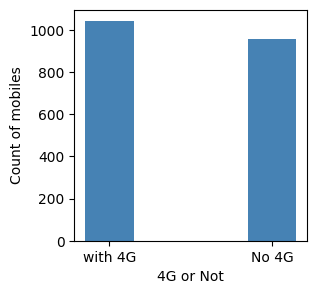

In [10]:
fig = plt.figure(figsize=(3,3))
four_g = mob.four_g.value_counts()
four_g
plt.bar(['with 4G','No 4G'], four_g.values, color = 'Steelblue',width = 0.3)
plt.xlabel('4G or Not')
plt.ylabel('Count of mobiles')
plt.show()

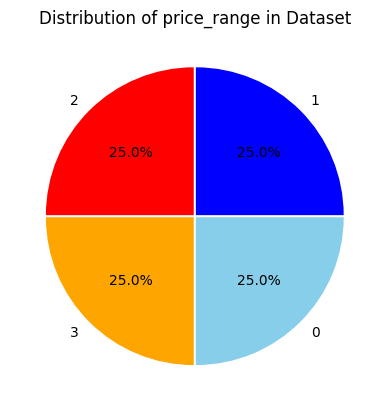

In [11]:
# Adjust the length of the explode array to match the length of counts
explode = [0.01] * len(counts)  # This will create an explode array with the same length as counts

# Create the pie chart
plt.pie(counts, labels=price_range, autopct='%1.1f%%', colors=['blue', 'red', 'orange','skyblue'],
        explode=explode)
plt.title('Distribution of price_range in Dataset')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

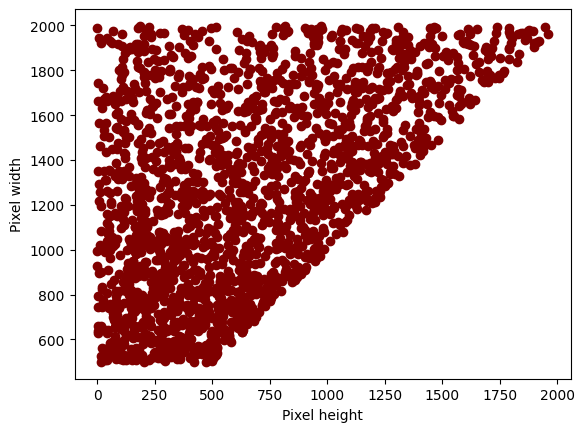

In [23]:
plt.scatter(mob.px_height, mob.px_width, color = "Maroon")
plt.xlabel("Pixel height")
plt.ylabel("Pixel width")
plt.show

In [13]:
#Splitting into input and output
x = mob.iloc[:,:-1]
y = mob.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size=0.25)


In [16]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_tr, y_tr)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pr = model.predict(x_te)
from sklearn.metrics import accuracy_score
accuracy_score(y_te, y_pr)*100

64.0

In [18]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(max_depth=10)
cls.fit(x_tr, y_tr)
y_pred = cls.predict(x_te)
accuracy_score(y_te, y_pred)*100

80.4

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [20]:
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

92.2

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

96.0